In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [ ]:
# Data Preprocessing

In [ ]:
## Encoding Data

In [6]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

In [8]:
df["Churn"]=Le.fit_transform(df["Churn"])

In [9]:
df["Churn"].unique()

array([0, 1])

In [10]:
df_eda = df.copy()

In [11]:
for col in df_eda:
    if df_eda[col].dtypes=='object':
        df_eda[col]=Le.fit_transform(df_eda[col])

In [12]:
df_eda.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1


In [ ]:
#Exploratory Data Analysis

In [13]:
corl = df_eda.corr()
corl

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006288,-0.002074,-0.026729,-0.012823,0.008035,-0.006483,0.004316,-0.012407,0.013292,...,-0.006918,0.001140,-0.007777,-0.016746,0.015028,-0.001945,0.011604,-0.003916,0.003027,-0.017447
gender,0.006288,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,...,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.005291,-0.008612
SeniorCitizen,-0.002074,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,...,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.037653,0.150889
Partner,-0.026729,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,...,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.059568,-0.150448
Dependents,-0.012823,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,...,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,-0.009572,-0.164221
tenure,0.008035,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,...,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.158523,-0.352229
PhoneService,-0.006483,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,...,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.083195,0.011942
MultipleLines,0.004316,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,...,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.114955,0.038037
InternetService,-0.012407,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,...,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.055724,-0.047291
OnlineSecurity,0.013292,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,...,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.042357,-0.289309


In [14]:
list_corl = corl[(corl>= 0.5)&(corl<1)]
list_corl = list_corl.stack().reset_index(name="corr_value")
list_corl = list_corl.sort_values(by='corr_value', ascending=False)

In [15]:
list_corl

,level_0,level_1,corr_value
0,tenure,Contract,0.671607
1,Contract,tenure,0.671607


In [16]:
import plotly.express as px

In [17]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int64  
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


<AxesSubplot:xlabel='tenure', ylabel='Contract'>

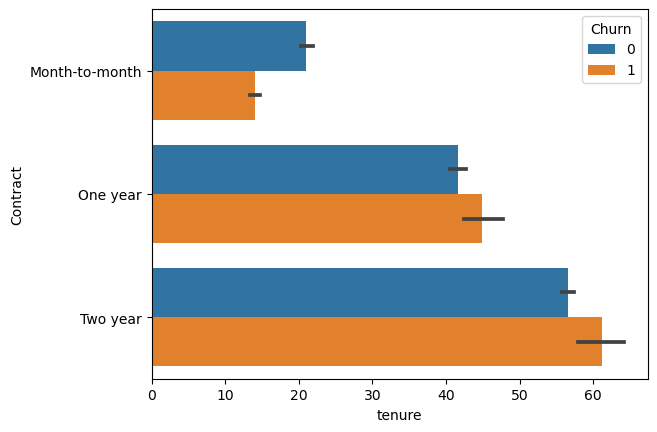

In [18]:
sns.barplot(df,
           x="tenure",
           y="Contract",
          hue="Churn")

<AxesSubplot:xlabel='OnlineSecurity', ylabel='Churn'>

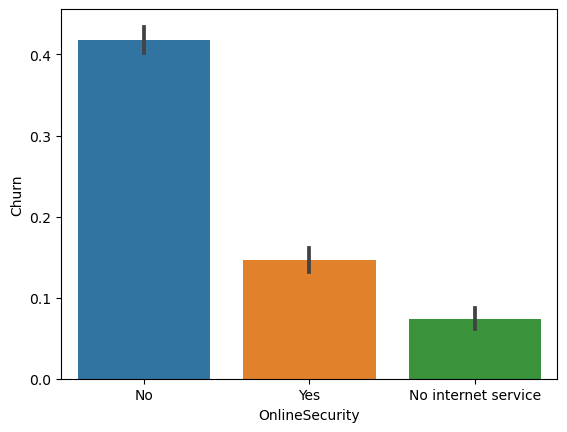

In [19]:
sns.barplot(df,
           x="OnlineSecurity",
           y="Churn")

<AxesSubplot:xlabel='StreamingTV', ylabel='Churn'>

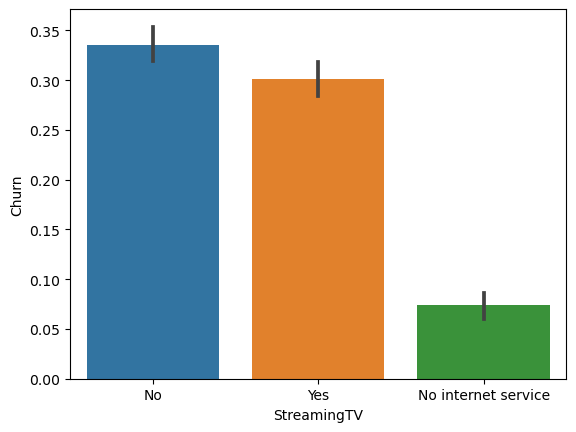

In [20]:
sns.barplot(df,
           x="StreamingTV",
           y="Churn")

<AxesSubplot:xlabel='TechSupport', ylabel='Churn'>

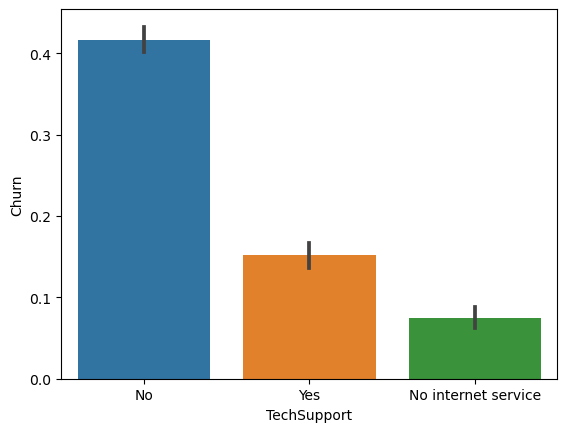

In [21]:
sns.barplot(df,
           x="TechSupport",
           y="Churn")

In [22]:
px.scatter_3d(df,
             x="tenure",
             y="Contract",
             z="TotalCharges",
             color="Churn")

In [1]:
sns.barplot(df,
           x="tenure",
           y="Churn")

NameError: name 'sns' is not defined

In [ ]:
#Customer Churn rate happen in customers with no online security service
#Customer Churn rate happen in customers with month to month tenure
#Customer Churn rate happen in customers with no TechSupport

In [23]:
churn = df[df["Churn"]==1].count()
no_churn = df[df["Churn"]==0].count()

In [24]:
churn

customerID          1869
gender              1869
SeniorCitizen       1869
Partner             1869
Dependents          1869
tenure              1869
PhoneService        1869
MultipleLines       1869
InternetService     1869
OnlineSecurity      1869
OnlineBackup        1869
DeviceProtection    1869
TechSupport         1869
StreamingTV         1869
StreamingMovies     1869
Contract            1869
PaperlessBilling    1869
PaymentMethod       1869
MonthlyCharges      1869
TotalCharges        1869
Churn               1869
dtype: int64

In [25]:
no_churn

customerID          5174
gender              5174
SeniorCitizen       5174
Partner             5174
Dependents          5174
tenure              5174
PhoneService        5174
MultipleLines       5174
InternetService     5174
OnlineSecurity      5174
OnlineBackup        5174
DeviceProtection    5174
TechSupport         5174
StreamingTV         5174
StreamingMovies     5174
Contract            5174
PaperlessBilling    5174
PaymentMethod       5174
MonthlyCharges      5174
TotalCharges        5174
Churn               5174
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [28]:
df_train = df.copy()

In [29]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Data Preprocessing

In [30]:
# Inisialisasi LabelEncoder
Le = LabelEncoder()

# List kolom yang ingin diubah menjadi bentuk numerik
columns_to_encode = ["gender", "Partner", "Dependents", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod"]

# Iterasi melalui setiap kolom dan mengubahnya menjadi bentuk numerik
for col in columns_to_encode:
    df_train[col] = Le.fit_transform(df_train[col])


In [31]:
df_train['TotalCharges'] = pd.to_numeric(df_train['TotalCharges'], errors='coerce')


In [32]:
df_trains=df_train.copy()
df_trains.dropna(inplace=True)

In [ ]:
# Machine Learning Modeling

In [33]:
X=df_trains.iloc[:,1:-1]
y=df_trains["Churn"].values

In [34]:
X_train_rus,X_test,y_train_rus,y_test = train_test_split(X,y,random_state=201,test_size=0.1)
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_resample(X_train_rus, y_train_rus)


In [35]:
rf=RandomForestClassifier()
model_rf=rf.fit(X_train_rus,y_train_rus)
y_pred_rf_rus = model_rf.predict(X_test)

In [36]:
print(classification_report(y_pred_rf_rus,y_test))

              precision    recall  f1-score   support

           0       0.71      0.89      0.79       410
           1       0.76      0.49      0.59       294

    accuracy                           0.72       704
   macro avg       0.73      0.69      0.69       704
weighted avg       0.73      0.72      0.71       704



In [37]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2023)

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, scoring='accuracy', n_iter=10, cv=5, random_state=201)
random_search.fit(X_train, y_train)
best_params = random_search.best_params_
best_score = random_search.best_score_


In [38]:
ht_pred=random_search.predict(X_test)
print(classification_report(ht_pred,y_test))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87       827
           1       0.53      0.70      0.60       228

    accuracy                           0.80      1055
   macro avg       0.72      0.76      0.73      1055
weighted avg       0.83      0.80      0.81      1055



In [39]:
print (best_params)
print (best_score)

{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': True}
0.8000702481073592


In [2]:
# Summary

##Customer Churn rate happen in customers with no online security service
##Customer Churn rate happen in customers with month to month tenure
##Customer Churn rate happen in customers with no TechSupport

#Strategies

### Customer Churn can be anticipated with improving online security service and Tech support, 
### In conclusion, this stragetigies can implemented to customer who Predicted have "1" Values with 80% Accuracy Successful Rate.
### Also if possible, the company can promoting service such as StreamingTv with special price in order to preventing customer churn.